# Sales Analysis

In [1]:
#Initial Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### *Part 1 Merging 12 months of sales data into a single CSV file.*

In [2]:
#Reading and Concatenating the CSV Files
df = pd.read_csv("./sales_data/Sales_April_2019.csv")

files_df = [file for file in os.listdir('./sales_data')]

monthly_sales_2019 = pd.DataFrame()

for file in files_df:
    df =  pd.read_csv("./sales_data/"+file)
    monthly_sales_2019 = pd.concat([monthly_sales_2019,df])
    
monthly_sales_2019.to_csv("monthly_sales_2019.csv", index=False)

In [3]:
#Reading the new concatenated csv
monthly_sales_2019_df = pd.read_csv("monthly_sales_2019.csv")
monthly_sales_2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
#Displaying Null Values in a new Dataframe
nan_df = monthly_sales_2019_df[monthly_sales_2019_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dropping NAN Values
monthly_sales_2019_df = monthly_sales_2019_df.dropna(how='all')
monthly_sales_2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Best Selling month? Revenue?

In [6]:
#Adding a Month Column
monthly_sales_2019_df["Month"] = monthly_sales_2019_df['Order Date'].str[0:2]
monthly_sales_2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [7]:
#Dropping Or values
monthly_sales_2019_df = monthly_sales_2019_df[monthly_sales_2019_df['Order Date'].str[0:2] != 'Or']    

In [8]:
#Converting Column types
monthly_sales_2019_df['Quantity Ordered'] = pd.to_numeric(monthly_sales_2019_df['Quantity Ordered'])
monthly_sales_2019_df['Price Each'] = pd.to_numeric(monthly_sales_2019_df['Price Each'])

In [9]:
#Adding a Sales Column
monthly_sales_2019_df['Sales'] = monthly_sales_2019_df['Quantity Ordered'] * monthly_sales_2019_df['Price Each']
monthly_sales_2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [10]:
#Naming A New Variable For Results
results = monthly_sales_2019_df.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1.811768e+06,1.822257e+06
02,13449,2.188885e+06,2.202022e+06
03,17005,2.791208e+06,2.807100e+06
04,20558,3.367671e+06,3.390670e+06
05,18667,3.135125e+06,3.152607e+06


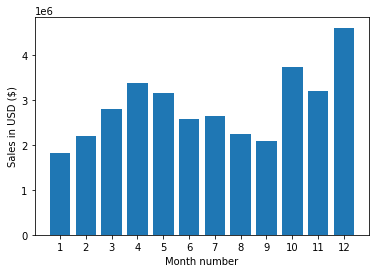

In [11]:
#Plotting Sales by Month
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Best Selling City?

In [12]:
#Adding a City Column
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

monthly_sales_2019_df['City'] = monthly_sales_2019_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
monthly_sales_2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [13]:
#Sum of sales by city
results_city = monthly_sales_2019_df.groupby('City').sum()#.sort_values(by='Sales', ascending=False)
results_city

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06
Austin (TX),11153,1.809874e+06,1.819582e+06
Boston (MA),22528,3.637410e+06,3.661642e+06
Dallas (TX),16730,2.752628e+06,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,5.452571e+06
New York City (NY),27932,4.635371e+06,4.664317e+06
Portland (ME),2750,4.471893e+05,4.497583e+05
Portland (OR),11303,1.860558e+06,1.870732e+06
San Francisco (CA),50239,8.211462e+06,8.262204e+06


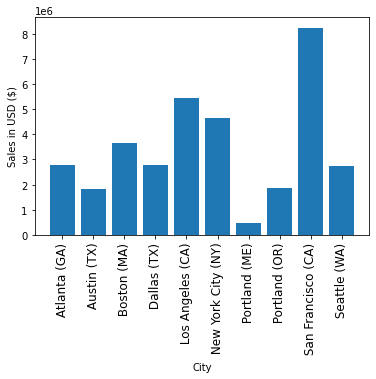

In [14]:
#Plotting Results by City
cities = [city for city, df in monthly_sales_2019_df.groupby('City')]
plt.bar(cities, results_city['Sales'])
plt.xticks(cities, rotation =90, size=12)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

### Times To Display Ads For Customer Purchase Maximization

In [15]:
#Formatting the Order Date column to datetime format
monthly_sales_2019_df['Order Date'] = pd.to_datetime(monthly_sales_2019_df['Order Date'])
monthly_sales_2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [16]:
#Creating New Columns for Hour and Minute
monthly_sales_2019_df['Hour'] = monthly_sales_2019_df['Order Date'].dt.hour
monthly_sales_2019_df['Minute'] = monthly_sales_2019_df['Order Date'].dt.minute
monthly_sales_2019_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


<function matplotlib.pyplot.show(close=None, block=None)>

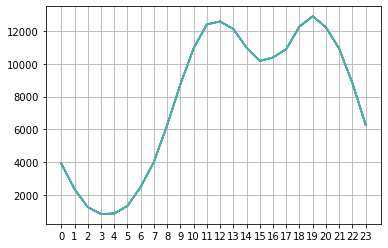

In [17]:
#Plotting The Hourly Purchased Chart
hours = [hour for hour, df in monthly_sales_2019_df.groupby('Hour')]
plt.plot(hours, monthly_sales_2019_df.groupby(['Hour']).count())
plt.xticks(hours, size=10)
plt.grid()
plt.show

## Recomendation for Times To Display Ads For Customer Purchase Maximization would be around 12pm or 7pm

### Products Most Often Sold Together

In [18]:
#Creating a New Dataframe With Duplicate Orders
duplicates_df = monthly_sales_2019_df[monthly_sales_2019_df['Order ID'].duplicated(keep=False)]
duplicates_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32


In [19]:
#Dropping Double Duplicate Rows
duplicates_df['Grouped'] = duplicates_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicates_df = duplicates_df[['Order ID', 'Grouped']].drop_duplicates()
duplicates_df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [20]:
#Iterating To See What Are The Most Common Items Bought Together.
count = Counter()

for row in duplicates_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Most Sold Product

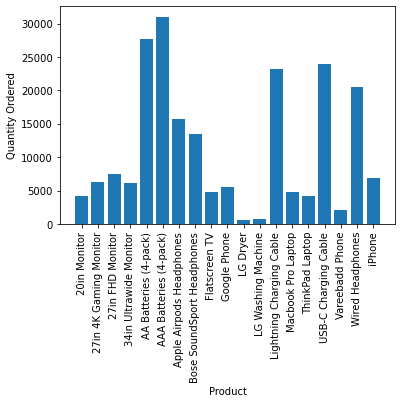

In [21]:
#Deriving Which Product Sold The Most
product_group = monthly_sales_2019_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

#Plotting the most sold products
product = [product for product, df in product_group]
plt.bar(product, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(product, rotation=90, size=10)
plt.show()

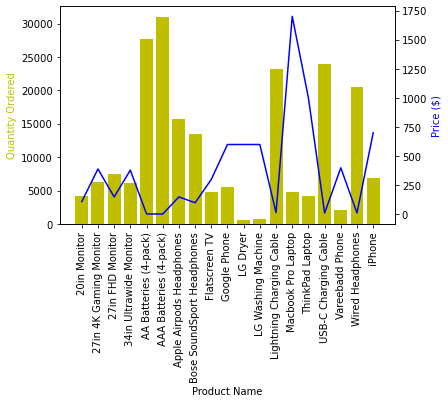

In [22]:
#Plotting A Double Y Axis Bar Chart For Product Name, Quantity Ordered And Price.
prices = monthly_sales_2019_df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color='y')
ax2.plot(product, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='y')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation=90, size=10)
plt.show()